# EX 1 - Follow the TODOs

**- Please ensure you follow the TODO and attach all necessary items to the report PDF file.**

**- Your '.py' code files will be scanned and checked automatically.**


## Part 1 (Problem 1: Bloom Filter )

*DO NOT CHANGE.*

In [3]:
import numpy as np
import hashlib
import matplotlib.pyplot as plt

# ---------- Bloom Filter Implementation ---------- #
class BloomFilter:
    def __init__(self, m, k):
        self.m = m  # number of bits
        self.k = k  # number of hash functions
        self.bits = np.zeros(m, dtype=bool)

    def _hashes(self, item):
        for i in range(self.k):
            digest = hashlib.md5((str(item) + str(i)).encode()).hexdigest()
            yield int(digest, 16) % self.m

    def add(self, item):
        for h in self._hashes(item):
            self.bits[h] = True

    def check(self, item):
        return all(self.bits[h] for h in self._hashes(item))



The function must be defined in the given Python file. DO NOT CHANGE this notebook code.

In [4]:
# TODO: complete file simulateFalsePositiveRate.py
#from simulateFalsePositiveRate import simulate_false_positive_rate
def simulate_false_positive_rate(m, k, n=100, test_size=5000):
    """
    Simulate the empirical false positive rate of a Bloom filter.

    Parameters:
        m (int): Number of bits in the Bloom filter.
        k (int): Number of hash functions.
        n (int): Number of items to insert.
        test_size (int): Number of unseen items to test.

    Returns:
        float: Empirical false positive rate.
    """
    # TODO: Create a BloomFilter object with the given m and k
    bf = BloomFilter(m, k)

    # TODO: Generate n distinct items to insert into the filter
    inserted = [f"item_{i}" for i in range(n)]

    # TODO: Insert all items into the Bloom filter
    for item in inserted:
        bf.add(item)

    # Create items that were NOT inserted
    test_items = [f"test_{i}" for i in range(test_size)]

    # TODO: Count how many of the test items cause a false positive
    false_positives = 0
    for item in test_items:
        if bf.check(item):
            false_positives += 1
   

    # TODO: Return the false positive rate
    return false_positives / test_size


DO NOT CHANGE.

In [5]:

# ---------- Experiment Parameters ---------- #
n = 100
m_values = [50, 100, 200, 300, 400, 500]
k_values = [1,3,5,7,9,11,13,15]

results = np.zeros((len(m_values), len(k_values)))

# ---------- Run Simulations ---------- #
for i, m in enumerate(m_values):
    for j, k in enumerate(k_values):
        results[i, j] = simulate_false_positive_rate(m, k, n=n)

You are allowed and should modify this part in the notebook for the plot results.

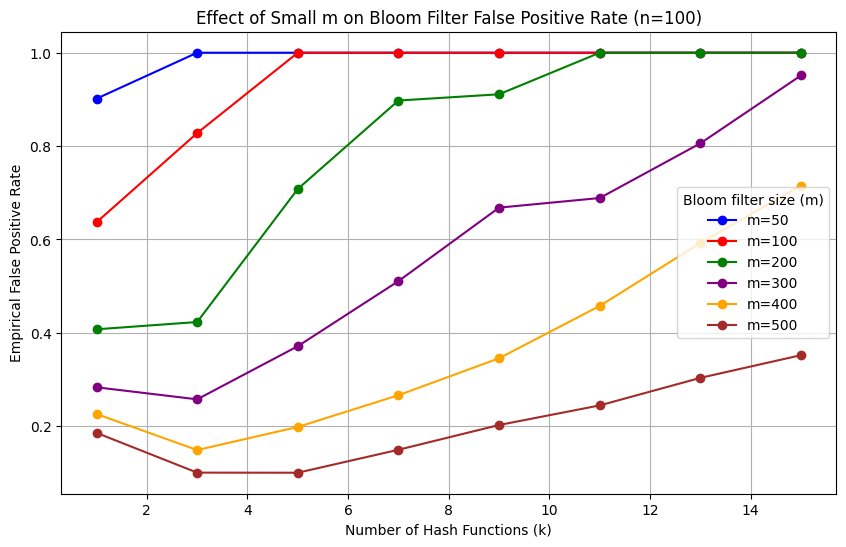

In [6]:

# ---------- Plot Results ---------- #
# TODO: Display the results

plt.figure(figsize=(10, 6))
#TODO: complete your code here
colors = ["blue", "red", "green", "purple", "orange", "brown"]
for i, m in enumerate(m_values):
    plt.plot(k_values, results[i], marker='o', label=f"m={m}", color=colors[i])

plt.xlabel("Number of Hash Functions (k)")
plt.ylabel("Empirical False Positive Rate")
plt.title("Effect of Small m on Bloom Filter False Positive Rate (n=100)")
plt.legend(title="Bloom filter size (m)")
plt.grid(True)
plt.show()

#TODO: Attach all the relevant outputs to the submission PDF report, Make sure it is organized and readable.

## Part 2 (Problem 2 Counting unique items)

In [7]:
import numpy as np
import hashlib
import math
import random


The function must be defined in the given Python file. DO NOT CHANGE this notebook code.


In [8]:
# TODO: complete file estimateUniqueItems.py
#from estimateUniqueItems import estimate_unique_items
def estimate_unique_items(items, m=100, k=5):
    """
    Estimate the number of unique items inserted into a Bloom filter
    based on the number of zero bits remaining.

    Parameters:
        items (list): The items to insert.
        m (int): Number of bits in the Bloom filter.
        k (int): Number of hash functions.

    Returns:
        float: Estimated number of unique items.
    """
    # Initialize Bloom filter
    bf = BloomFilter(m, k)
    
    #TODO: complete your code here
    for item in items:
        bf.add(item)
    
    num_zero_bits = np.sum(bf.bits == 0)

    if num_zero_bits == 0:
        return m  # All bits are set, cannot estimate
    estimated_n = - (m / k) * np.log(num_zero_bits / m)
    return estimated_n

DO NOT CHANGE.

In [9]:


# ---------- Data Generator ----------
def generate_random_items(n=100):
    """
    Generate n items with random duplicates.
    Example: about half might be duplicates, others unique.
    """
    num_unique = random.randint(30, n)  # random number of unique items
    base_items = [f"item_{i}" for i in range(num_unique)]

    # Add random duplicates until reaching n total items
    items = [random.choice(base_items) for _ in range(n)]
    return items


# ---------- Simulation ----------
def run_simulation(trials=100, m=100, k=5, n=100):
    errors = []
    for t in range(trials):
        items = generate_random_items(n)
        true_unique = len(set(items))
        est_unique = estimate_unique_items(items, m, k)
        error = abs(est_unique - true_unique)
        errors.append(error)
        print(f"Trial {t+1:3d}: True = {true_unique:3d}, Estimated = {est_unique:6.2f}, Error = {error:5.2f}")

    avg_error = np.mean(errors)
    print(f"\nAverage absolute error over {trials} runs: {avg_error:.2f}")
    return avg_error


run_simulation(trials=100, m=100, k=5, n=100)

#TODO: Report your results in the PDF file, explaining what we obtain and whether it meets expectations.



Trial   1: True =  58, Estimated =  70.13, Error = 12.13
Trial   2: True =  61, Estimated =  70.13, Error =  9.13
Trial   3: True =  61, Estimated =  56.27, Error =  4.73
Trial   4: True =  49, Estimated =  56.27, Error =  7.27
Trial   5: True =  55, Estimated =  56.27, Error =  1.27
Trial   6: True =  56, Estimated =  64.38, Error =  8.38
Trial   7: True =  47, Estimated =  59.91, Error = 12.91
Trial   8: True =  63, Estimated =  59.91, Error =  3.09
Trial   9: True =  38, Estimated =  40.80, Error =  2.80
Trial  10: True =  62, Estimated =  64.38, Error =  2.38
Trial  11: True =  49, Estimated =  50.51, Error =  1.51
Trial  12: True =  61, Estimated =  64.38, Error =  3.38
Trial  13: True =  58, Estimated =  59.91, Error =  1.91
Trial  14: True =  41, Estimated =  46.05, Error =  5.05
Trial  15: True =  46, Estimated =  56.27, Error = 10.27
Trial  16: True =  49, Estimated =  53.19, Error =  4.19
Trial  17: True =  44, Estimated =  48.16, Error =  4.16
Trial  18: True =  62, Estimate

np.float64(5.699650650045656)

The function must be defined in the given Python file. DO NOT CHANGE this notebook code.


In [10]:
# TODO: complete file estimateUniqueItemsUsingOnes.py
#from estimateUniqueItemsUsingOnes import estimate_unique_items_using_ones
def estimate_unique_items_using_ones(items, m=100, k=5):
    """
    Estimate the number of unique items inserted into a Bloom filter
    based on the number of 1 bits (set bits) instead of zeros.

    Formula: #TODO: write the formula you are using here
      
    """
    bf = BloomFilter(m, k)

    #TODO: complete your code here
    for item in items:
        bf.add(item)
    
    num_one_bits = np.sum(bf.bits == 1)

    if num_one_bits == m:
        return m  # All bits are set, cannot estimate
    estimated_n = - (m / k) * np.log(1 - num_one_bits / m)
    return estimated_n

In [11]:

# ---------- Simulation ----------
def run_simulation_with_ones(trials=100, m=100, k=5, n=100):
    errors = []
    for t in range(trials):
        items = generate_random_items(n)
        true_unique = len(set(items))
        est_unique = estimate_unique_items_using_ones(items, m, k)
        error = abs(est_unique - true_unique)
        errors.append(error)
        print(f"Trial {t+1:3d}: True = {true_unique:3d}, Estimated = {est_unique:6.2f}, Error = {error:5.2f}")

    avg_error = np.mean(errors)
    print(f"\nAverage absolute error over {trials} runs: {avg_error:.2f}")
    return avg_error


run_simulation_with_ones(trials=100, m=100, k=5, n=100)

#TODO: Report your results in the PDF file, explaining what we obtain and whether it meets expectations.


Trial   1: True =  52, Estimated =  59.91, Error =  7.91
Trial   2: True =  38, Estimated =  42.41, Error =  4.41
Trial   3: True =  61, Estimated =  64.38, Error =  3.38
Trial   4: True =  59, Estimated =  64.38, Error =  5.38
Trial   5: True =  58, Estimated =  92.10, Error = 34.10
Trial   6: True =  61, Estimated =  59.91, Error =  1.09
Trial   7: True =  34, Estimated =  36.65, Error =  2.65
Trial   8: True =  56, Estimated =  64.38, Error =  8.38
Trial   9: True =  58, Estimated =  59.91, Error =  1.91
Trial  10: True =  43, Estimated =  46.05, Error =  3.05
Trial  11: True =  43, Estimated =  50.51, Error =  7.51
Trial  12: True =  52, Estimated =  70.13, Error = 18.13
Trial  13: True =  56, Estimated =  59.91, Error =  3.91
Trial  14: True =  52, Estimated =  59.91, Error =  7.91
Trial  15: True =  47, Estimated =  53.19, Error =  6.19
Trial  16: True =  46, Estimated =  53.19, Error =  7.19
Trial  17: True =  49, Estimated =  56.27, Error =  7.27
Trial  18: True =  60, Estimate

np.float64(6.535632534727556)

The function must be defined in the given Python file. DO NOT CHANGE this notebook code.


In [18]:
import hashlib
# TODO: complete file estimateUniqueItemsTrailingZeros.py
#from estimateUniqueItemsTrailingZeros import estimate_unique_items_trailing_zeros
def estimate_unique_items_trailing_zeros(items):
    """
    Estimate the number of unique items using the maximum number of trailing zeros
    in the binary representation of a hashed value for each item.

    Parameters:
        items (list): List of items (can include duplicates).

    Returns:
        float: Estimated number of unique items.
    """
    if not items:
        return 0

    max_trailing_zeros = 0

    for item in items:  
        digest = int(hashlib.md5(str(item).encode()).hexdigest(), 16)
        trailing_zeros = (digest & -digest).bit_length() - 1
        max_trailing_zeros = max(max_trailing_zeros, trailing_zeros)


    return 2 ** max_trailing_zeros


*DO NOT CHANGE.*

In [19]:

# ---------- Simulation ----------
def run_simulation_with_trailing_zeros(trials=100, m=100, k=5, n=100):
    errors = []
    for t in range(trials):
        items = generate_random_items(n)
        true_unique = len(set(items))
        est_unique = estimate_unique_items_trailing_zeros(items)
        error = abs(est_unique - true_unique)
        errors.append(error)
        print(f"Trial {t+1:3d}: True = {true_unique:3d}, Estimated = {est_unique:6.2f}, Error = {error:5.2f}")

    avg_error = np.mean(errors)
    print(f"\nAverage absolute error over {trials} runs: {avg_error:.2f}")
    return avg_error


run_simulation_with_trailing_zeros(trials=100, m=100, k=5, n=100)

#TODO: Report your results in the PDF file, explaining what we obtain and whether it meets expectations.


Trial   1: True =  65, Estimated =  64.00, Error =  1.00
Trial   2: True =  59, Estimated = 512.00, Error = 453.00
Trial   3: True =  34, Estimated =  32.00, Error =  2.00
Trial   4: True =  60, Estimated = 256.00, Error = 196.00
Trial   5: True =  66, Estimated = 512.00, Error = 446.00
Trial   6: True =  45, Estimated =  32.00, Error = 13.00
Trial   7: True =  45, Estimated = 512.00, Error = 467.00
Trial   8: True =  44, Estimated =  32.00, Error = 12.00
Trial   9: True =  47, Estimated =  32.00, Error = 15.00
Trial  10: True =  53, Estimated = 512.00, Error = 459.00
Trial  11: True =  61, Estimated =  64.00, Error =  3.00
Trial  12: True =  45, Estimated =  32.00, Error = 13.00
Trial  13: True =  53, Estimated = 512.00, Error = 459.00
Trial  14: True =  65, Estimated = 512.00, Error = 447.00
Trial  15: True =  40, Estimated =  32.00, Error =  8.00
Trial  16: True =  57, Estimated = 256.00, Error = 199.00
Trial  17: True =  41, Estimated =  32.00, Error =  9.00
Trial  18: True =  41, 

np.float64(185.85)

The function must be defined in the given Python file. DO NOT CHANGE this notebook code.


In [36]:
import hashlib
# TODO: complete file estimateUniqueItemsTrailingZeros.py
#from estimateUniqueItemsTrailingOnes import estimate_unique_items_trailing_ones
def estimate_unique_items_trailing_ones(items):
    """
    Estimate the number of unique items using the maximum number of trailing ones
    in the binary representation of a hashed value for each item.

    Parameters:
        items (list): List of items (can include duplicates).

    Returns:
        float: Estimated number of unique items.
    """
    if not items:
        return 0 
    
    max_trailing_ones = 0

    for item in items:
        # hash item to a large integer
        digest = int(hashlib.md5(str(item).encode()).hexdigest(), 16)
        # convert to binary string
        binary_repr = bin(digest)[2:]
        print("binary:", bin(57))
        print("binary str repr:", bin(57)[2:])

        # count trailing ones in the binary representation
        trailing_ones = len(binary_repr) - len(binary_repr.rstrip('1'))
        print(len(bin(57)[2:]))
        print(len(bin(57)[2:].rstrip('1')))
        print("trailing ones:", len(bin(57)[2:0]) - len(bin(57)[2:0].rstrip('1')))

        max_trailing_ones = max(max_trailing_ones, trailing_ones) 
    

    return 2 ** max_trailing_ones




*DO NOT CHANGE.*

In [37]:

# ---------- Simulation ----------
def run_simulation_with_trailing_ones(trials=100, m=100, k=5, n=100):
    errors = []
    for t in range(trials):
        items = generate_random_items(n)
        true_unique = len(set(items))
        est_unique = estimate_unique_items_trailing_ones(items)
        error = abs(est_unique - true_unique)
        errors.append(error)
        print(f"Trial {t+1:3d}: True = {true_unique:3d}, Estimated = {est_unique:6.2f}, Error = {error:5.2f}")

    avg_error = np.mean(errors)
    print(f"\nAverage absolute error over {trials} runs: {avg_error:.2f}")
    return avg_error


run_simulation_with_trailing_ones(trials=100, m=100, k=5, n=100)

#TODO: Report your results in the PDF file, explaining what we obtain and whether it meets expectations.



binary: 0b111001
binary str repr: 111001
6
5
trailing ones: 0
binary: 0b111001
binary str repr: 111001
6
5
trailing ones: 0
binary: 0b111001
binary str repr: 111001
6
5
trailing ones: 0
binary: 0b111001
binary str repr: 111001
6
5
trailing ones: 0
binary: 0b111001
binary str repr: 111001
6
5
trailing ones: 0
binary: 0b111001
binary str repr: 111001
6
5
trailing ones: 0
binary: 0b111001
binary str repr: 111001
6
5
trailing ones: 0
binary: 0b111001
binary str repr: 111001
6
5
trailing ones: 0
binary: 0b111001
binary str repr: 111001
6
5
trailing ones: 0
binary: 0b111001
binary str repr: 111001
6
5
trailing ones: 0
binary: 0b111001
binary str repr: 111001
6
5
trailing ones: 0
binary: 0b111001
binary str repr: 111001
6
5
trailing ones: 0
binary: 0b111001
binary str repr: 111001
6
5
trailing ones: 0
binary: 0b111001
binary str repr: 111001
6
5
trailing ones: 0
binary: 0b111001
binary str repr: 111001
6
5
trailing ones: 0
binary: 0b111001
binary str repr: 111001
6
5
trailing ones: 0
binary: 

np.float64(126.66)

## Part 3 (Problem 3 Jaccard Similarity)

The function must be defined in the given Python file. DO NOT CHANGE this notebook code.


In [16]:
# ------------------ Jaccard Estimator ------------------ #
# TODO: complete file bloomFilterJaccard.py
#from bloomFilterJaccard import bloom_filter_jaccard
def bloom_filter_jaccard(A, B, m=100, k=5):
    """
    Estimate Jaccard similarity using Bloom filters.
    
    Parameters:
        A, B: lists or sets of items
        m: Bloom filter size
        k: number of hash functions
    
    Returns:
        Estimated Jaccard similarity (float)
    """
    bf_A = BloomFilter(m, k)
    bf_B = BloomFilter(m, k)

    for a in A:
        bf_A.add(a)

    for b in B:
        bf_B.add(b)

    bits_A = bf_A.bits
    bits_B = bf_B.bits

    intersect = [i for i, (a, b) in enumerate(zip(bits_A, bits_B)) if a and b]

    return len(intersect) / (len(A)+len(B)-len(intersect))

*DO NOT CHANGE.*

In [17]:
# ------------------ Simulation ------------------ #
def simulate_bloom_jaccard(trials=10, n=50, m=100, k=5):
    errors = []
    for t in range(1, trials + 1):
        # Random overlap: choose a random number of common elements
        common = random.randint(0, n)
        A_unique = [f"A_{i}_{t}" for i in range(n - common)]
        B_unique = [f"B_{i}_{t}" for i in range(n - common)]
        common_items = [f"C_{i}_{t}" for i in range(common)]

        A = A_unique + common_items
        B = B_unique + common_items

        true_jaccard = len(set(A) & set(B)) / len(set(A) | set(B))
        est_jaccard = bloom_filter_jaccard(A, B, m, k)

        errors.append(abs(est_jaccard - true_jaccard))

        print(f"Trial {t}: True Jaccard = {true_jaccard:.3f}, Estimated = {est_jaccard:.3f}, Overlap = {common}")

    avg_error = np.mean(errors)
    print(f"\nAverage absolute error over {trials} trials: {avg_error:.4f}")

# ------------------ Example Usage ------------------ #
simulate_bloom_jaccard(trials=10, n=50, m=200, k=5)

#TODO: Report your results in the PDF file, explaining what we obtain and whether it meets expectations.


Trial 1: True Jaccard = 0.724, Estimated = -3.941, Overlap = 42
Trial 2: True Jaccard = 0.351, Estimated = -9.333, Overlap = 26
Trial 3: True Jaccard = 0.064, Estimated = 13.286, Overlap = 6
Trial 4: True Jaccard = 0.020, Estimated = -34.333, Overlap = 2
Trial 5: True Jaccard = 0.538, Estimated = -6.556, Overlap = 35
Trial 6: True Jaccard = 0.220, Estimated = -13.500, Overlap = 18
Trial 7: True Jaccard = 0.299, Estimated = -6.882, Overlap = 23
Trial 8: True Jaccard = 0.887, Estimated = -3.500, Overlap = 47
Trial 9: True Jaccard = 0.099, Estimated = -12.111, Overlap = 9
Trial 10: True Jaccard = 0.190, Estimated = -17.667, Overlap = 16

Average absolute error over 10 trials: 12.4374
